In [1]:
import cv2
import numpy as np 
import os
import shutil
import matplotlib.pyplot as plt

PATH_sample_image = 'test2/images/1.png'
img = cv2.imread(PATH_sample_image, cv2.IMREAD_UNCHANGED)#cv2.IMREAD_UNCHANGED cv2.IMREAD_GRAYSCALE cv2.IMREAD_COLOR
 
dimensions = img.shape
 
# height, width, number of channels in image
height = img.shape[0]
width = img.shape[1]
channels = img.shape[2]
 
print('Image Dimension    : ',dimensions)
print('Image Height       : ',height)
print('Image Width        : ',width)
print('Number of Channels : ',channels)

Image Dimension    :  (720, 1280, 3)
Image Height       :  720
Image Width        :  1280
Number of Channels :  3


In [2]:
import re
import os
import copy
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# set labels direction
PATH_labels='test2/labels/' 
PATH_images='test2/images/'

# set main direction (INFO: Change the path according to your own directory.)
os.chdir("C:/Users/Kushagra/Desktop/Kushagra/")

# new_labels: folder for yolo labels   
os.makedirs("new_labels")

# train valid test folders
os.makedirs("dataset")

os.makedirs("dataset/train")
os.makedirs("dataset/train/images")
os.makedirs("dataset/train/images/k")
os.makedirs("dataset/train/labels")
os.makedirs("dataset/train/labels/k")

os.makedirs("dataset/valid")
os.makedirs("dataset/valid/images")
os.makedirs("dataset/valid/images/k")
os.makedirs("dataset/valid/labels")
os.makedirs("dataset/valid/labels/k")

os.makedirs("dataset/test")
os.makedirs("dataset/test/images")
os.makedirs("dataset/test/images/k")
os.makedirs("dataset/test/labels")
os.makedirs("dataset/test/labels/k")

In [3]:
#fix three mismatch

names = os.listdir(PATH_labels)
for name in names: 
    a = name
    file1 = open(PATH_labels+name,"r")
    text = (file1.read())
    i=0
    new_txt = ""
    for i in range(len(text.split("\n")[:-1])):
      lable = text.split("\n")[:-1][i][:2]
      line = text.split("\n")[:-1][i][2:]
      new_line = "%s "%(int(lable)-1) ################ fix labels by add -1###################### 
      counter=0
      list_of_items = []
      for item in (line.split(" ")):
        if (item != ''):
            list_of_items.append(float(item))
      #################### below fix normalize and offset  ######################
      new_txt = new_txt+new_line+"%s %s %s %s\n"%(list_of_items[0]/(3840/3),(list_of_items[1]+list_of_items[3])/(2160/3), list_of_items[2]/(2688/3), list_of_items[3]/(1520/3))
    file2 = open('new_labels/'+name,"w")  
    file2.write(new_txt)

In [4]:
# preper labels text file to np array for plot
def text_to_np_for_plot(name):
    file1 = open( name,"r")
    b = (file1.read())
    cor =[]
    for i in range(len(b.split("\n")[:-1])):
      lable = b.split("\n")[:-1][i][:2]
      line = b.split("\n")[:-1][i][2:]
      co =0 
      line_ = [int(lable)]
      for item in (line.split(" ")):

        if (item != ''):
          line_.append(float(item))
          co=co+1
      cor.append(line_)
    cor = np.array(cor)
    return cor

In [5]:
#plot image by boxes
def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]]*w 
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]]*h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    for i in range(len(annotation_list)):
      plt.plot(annotation_list[i][1]*w ,annotation_list[i][2]*h,marker='v',color='red')

    plt.imshow(np.array(image))
    plt.savefig("myimage.png", dpi=300)
    plt.show()
    

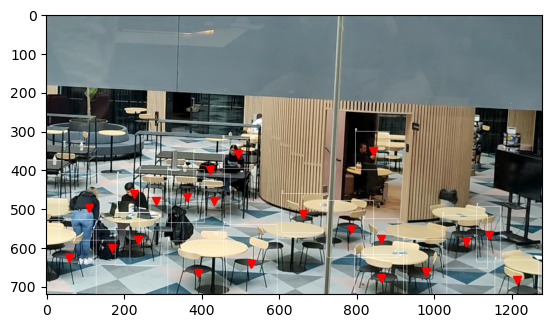

In [6]:
class_name_to_id_mapping = {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6, "H": 7, "I": 8, "J": 9, "K": 10, "L": 11, "M": 12, "N":13, "O": 14, "P": 15, "Q": 16, "R": 17, "S": 18, "T": 19, "U": 20}
class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

#open sample image and label files
image = Image.open('test2/images/36.png')
cor = text_to_np_for_plot("new_labels/36.txt")

#Plot the Bounding Box
plot_bounding_box(image, cor)

In [7]:
#split data to trian valid test
names = os.listdir(PATH_images)
train_len=990
valid_len=124
test_len=124
for name in names: 
  if int(name[:-4]) < train_len:
    shutil.copyfile( PATH_images+'/'+name, 'dataset/train/images/k/'+name)
    shutil.copyfile('new_labels/'+name[:-4]+'.txt', 'dataset/train/labels/k/'+name[:-4]+'.txt')
  elif int(name[:-4]) < train_len+valid_len and int(name[:-4]) >= train_len :
    shutil.copyfile( PATH_images+'/'+name, 'dataset/valid/images/k/'+name)
    shutil.copyfile('new_labels/'+name[:-4]+'.txt', 'dataset/valid/labels/k/'+name[:-4]+'.txt')
  elif int(name[:-4]) > train_len+valid_len :
    shutil.copyfile(PATH_images+'/'+name, 'dataset/test/images/k/'+name)
    shutil.copyfile('new_labels/'+name[:-4]+'.txt', 'dataset/test/labels/k/'+name[:-4]+'.txt')
